# Ejercicios del libro Nonlinear Dynamics And Chaos -Strogatz, S. H. 

## Capítulo 6: Phase Plane 
Sistemas de dimensión dos no lineales enfocado a los puntos de equilibrio 

**Ejemplo**
$$\dot{x} = -x + x^3$$
$$\dot{y} = -2y$$

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sympy import var, solve, Matrix,det

In [2]:
eje = np.arange(-2,2,0.01)
x = eje
y = eje
X,Y = np.meshgrid(x,y)

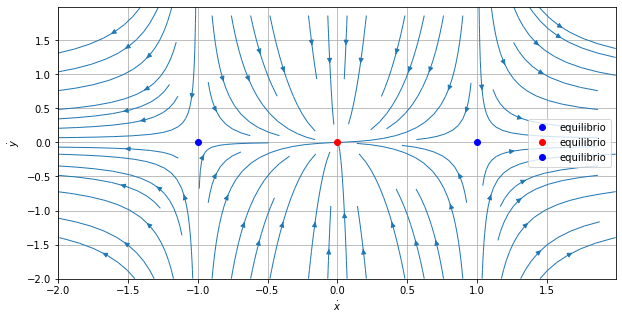

In [3]:
# encontrar las raíces 
x, y = var('x y')

f1 = -x + x**3
f2 = -2*y 

sols = solve((f1, f2), (x, y))

f = Matrix((f1,f2))
jacobiano = f.jacobian((x,y)).T

# clasificando los puntos con la ayuda de los valores propios 
g = []
for sol in sols:
    matrix =(jacobiano.subs([(x,sol[0]),(y,sol[1])]))
    l1 = var('l_1')
    d=det((matrix-l1*Matrix([[1,0], [0,1]])))
    h = solve(d,l1)
    if h[0]<0 and h[1] <0:
        g.append('r')
    else:
        g.append('b')

#encontrar los flujos 
x_dot = -X + X**3
y_dot = -2*Y

plt.figure(figsize=(10,5))

plt.streamplot(X,Y,x_dot,y_dot,density = 1,linewidth=1,minlength=0.2)
for i,sol in enumerate(sols):
    plt.plot(sol[0],sol[1],'o'+g[i],label="equilibrio")

plt.grid()
plt.xlabel('$\dot{x}$')
plt.ylabel('$\dot{y}$')
plt.legend(loc='best')
plt.show()

### Rabbits versus Sheep

$$\dot{x} = x(3-x-2y) \\
\dot{y} = y(2-x-y)$$

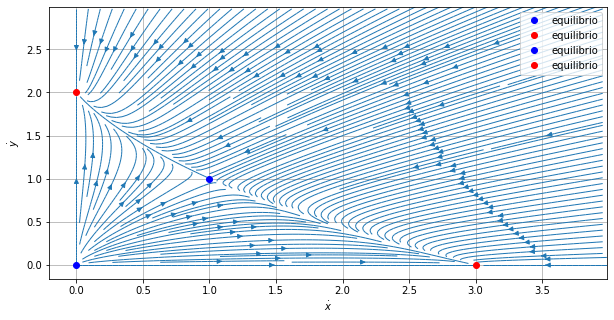

In [11]:
X,Y = np.meshgrid(np.arange(0,4,0.01),np.arange(0,3,0.01))

# encontrar las raíces 
x, y = var('x y')

f1 = x*(3-x-2*y)
f2 = y*(2-x-y) 

sols = solve((f1, f2), (x, y))

f = Matrix((f1,f2))
jacobiano = f.jacobian((x,y)).T

# clasificando los puntos con la ayuda de los valores propios 
g = []
for sol in sols:
    matrix =(jacobiano.subs([(x,sol[0]),(y,sol[1])]))
    l1 = var('l_1')
    d=det((matrix-l1*Matrix([[1,0], [0,1]])))
    h = solve(d,l1)
    if h[0]<0 and h[1] <0:
        g.append('r')
    else:
        g.append('b')

#encontrar los flujos 
x_dot = X*(3 - X - 2*Y)
y_dot = Y*(2- X - Y)

plt.figure(figsize=(10,5))

plt.streamplot(X,Y,x_dot,y_dot,density =3,linewidth=1,minlength=0.2)
for i,sol in enumerate(sols):
    plt.plot(sol[0],sol[1],'o'+g[i],label="equilibrio")

plt.grid()
plt.xlabel('$\dot{x}$')
plt.ylabel('$\dot{y}$')
plt.legend(loc='best')
plt.show()